### Data exploration/ pre-processing ###

In [1]:
import pandas as pd


df = pd.read_csv('Assignment DataSet.csv')

#df.info()
df.head()

,Unnamed: 0,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
0,0,41186889,Caucasian,Female,[80-90),1,6,7,13,69,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
1,1,83591073,Caucasian,Female,[80-90),6,1,17,5,34,...,No,No,Steady,No,No,No,No,No,No,NO
2,2,68337009,Other,Male,[60-70),1,2,1,1,37,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
3,3,73175076,Caucasian,Male,[40-50),1,1,7,4,56,...,No,No,Steady,Up,No,No,No,Ch,Yes,YES
4,4,31718349,Caucasian,Female,[70-80),1,1,7,1,38,...,No,No,Steady,No,No,No,No,No,No,NO


### ERASING REPEATED PATIENTS

In [2]:

duplicates = df[df['patient_nbr'].duplicated(keep=False)] 
last_occurrences = duplicates.drop_duplicates(subset='patient_nbr', keep='last')
#df.head()
df = pd.concat([df.drop(duplicates.index), last_occurrences])
df.head()

,Unnamed: 0,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
0,0,41186889,Caucasian,Female,[80-90),1,6,7,13,69,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
1,1,83591073,Caucasian,Female,[80-90),6,1,17,5,34,...,No,No,Steady,No,No,No,No,No,No,NO
2,2,68337009,Other,Male,[60-70),1,2,1,1,37,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
3,3,73175076,Caucasian,Male,[40-50),1,1,7,4,56,...,No,No,Steady,Up,No,No,No,Ch,Yes,YES
4,4,31718349,Caucasian,Female,[70-80),1,1,7,1,38,...,No,No,Steady,No,No,No,No,No,No,NO


### ERASING COLUMNS FIRST THREE COLUMNS

In [3]:
columns_to_remove = [0, 1, 2] # List of column positions not interesting for the work
df = df.drop(df.columns[columns_to_remove], axis=1)

df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
0,Female,[80-90),1,6,7,13,69,4,38,0,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
1,Female,[80-90),6,1,17,5,34,0,4,0,...,No,No,Steady,No,No,No,No,No,No,NO
2,Male,[60-70),1,2,1,1,37,1,13,3,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
3,Male,[40-50),1,1,7,4,56,2,22,0,...,No,No,Steady,Up,No,No,No,Ch,Yes,YES
4,Female,[70-80),1,1,7,1,38,2,1,0,...,No,No,Steady,No,No,No,No,No,No,NO


### Correlation between diagnosis

In [4]:

columns_corr=['diag_1','diag_2','diag_3','diag_4']
correlation=[]
columns=[]
for i in columns_corr:
    for j in columns_corr:
        correlation.append(df[i].corr(df[j]))
        columns.append(i+','+j)



print(correlation)
print(columns)



[1.0, 0.026858235098138325, 0.032446436795047856, 0.010502490939179147, 0.026858235098138325, 1.0, 0.08757760173616524, 0.8953080129126207, 0.032446436795047856, 0.08757760173616523, 0.9999999999999999, 0.08302054301549167, 0.010502490939179146, 0.8953080129126207, 0.08302054301549167, 1.0]
['diag_1,diag_1', 'diag_1,diag_2', 'diag_1,diag_3', 'diag_1,diag_4', 'diag_2,diag_1', 'diag_2,diag_2', 'diag_2,diag_3', 'diag_2,diag_4', 'diag_3,diag_1', 'diag_3,diag_2', 'diag_3,diag_3', 'diag_3,diag_4', 'diag_4,diag_1', 'diag_4,diag_2', 'diag_4,diag_3', 'diag_4,diag_4']


### Removing diag_4 due to high correlation with diag_2

In [5]:
df = df.drop('diag_4', axis=1)

df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
0,Female,[80-90),1,6,7,13,69,4,38,0,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
1,Female,[80-90),6,1,17,5,34,0,4,0,...,No,No,Steady,No,No,No,No,No,No,NO
2,Male,[60-70),1,2,1,1,37,1,13,3,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
3,Male,[40-50),1,1,7,4,56,2,22,0,...,No,No,Steady,Up,No,No,No,Ch,Yes,YES
4,Female,[70-80),1,1,7,1,38,2,1,0,...,No,No,Steady,No,No,No,No,No,No,NO


### Removing 'No' columns  

In [6]:
columns_to_remove = [18,20,23,25,30] # List of column positions not interesting for the work
df = df.drop(df.columns[columns_to_remove], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4943
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    4837 non-null   object 
 1   age                       4837 non-null   object 
 2   admission_type_id         4837 non-null   int64  
 3   discharge_disposition_id  4837 non-null   int64  
 4   admission_source_id       4837 non-null   int64  
 5   time_in_hospital          4837 non-null   int64  
 6   num_lab_procedures        4837 non-null   int64  
 7   num_procedures            4837 non-null   int64  
 8   num_medications           4837 non-null   int64  
 9   number_outpatient         4837 non-null   int64  
 10  number_emergency          4837 non-null   int64  
 11  number_inpatient          4837 non-null   int64  
 12  diag_1                    4837 non-null   float64
 13  diag_2                    4837 non-null   float64
 14  diag_3       

### Removing columns with zero variance

In [7]:
variances=[]
column_number=[]
column_name=[]
number=0
for column in df.columns:
    column_data = df[column] 
    if column_data.dtype == 'object':
        encoded_column = pd.factorize(column_data)[0]
        variance = encoded_column.var()
        if variance<0.1:
            variances.append(variance)
            column_number.append(number)
            column_name.append(df.columns[number])
        
    else:
        variance = column_data.var()
        if variance<0.1:
            variances.append(variance)
            column_number.append(number)
            column_name.append(df.columns[number])

    number+=1

print(variances)
print(column_number)
print(column_name)

df = df.drop(df.columns[column_number], axis=1)


[0.001859588899551896, 0.08458641948740432, 0.07863452115564465, 0.07503348033636897, 0.0002066969733895598, 0.05648375195525462, 0.0002066969733895598]
[16, 17, 19, 20, 21, 24, 25]
['chlorpropamide', 'glimepiride', 'pioglitazone', 'rosiglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin']


### Removing unknown columns

In [8]:
columns_to_remove = [2,3,4] 
df = df.drop(df.columns[columns_to_remove], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4943
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4837 non-null   object 
 1   age                 4837 non-null   object 
 2   time_in_hospital    4837 non-null   int64  
 3   num_lab_procedures  4837 non-null   int64  
 4   num_procedures      4837 non-null   int64  
 5   num_medications     4837 non-null   int64  
 6   number_outpatient   4837 non-null   int64  
 7   number_emergency    4837 non-null   int64  
 8   number_inpatient    4837 non-null   int64  
 9   diag_1              4837 non-null   float64
 10  diag_2              4837 non-null   float64
 11  diag_3              4837 non-null   float64
 12  number_diagnoses    4837 non-null   int64  
 13  glyburide           4837 non-null   object 
 14  citoglipton         4837 non-null   object 
 15  insulin             4837 non-null   object 
 16  change     

### From numerical to nominal of diag_1, diag_2 and diag_3

In [9]:
def map_numerical_to_nominal_2(value):
    if 390 <= value <= 459 or value == 785:
        return 'Circulatory'
    elif 249.99 < value < 251:
        return 'Diabetes'
    elif 460 <= value <= 519 or value == 786:
        return 'Respiratory'
    elif 520 <= value <= 579 or value == 787:
        return 'Digestive'
    elif 800 <= value <= 999:
        return 'Injury'
    elif 710 <= value <= 739:
        return 'Musculoskeletal'
    elif 580 <= value <= 629 or value == 788:
        return 'Genitourinary'
    elif 240 <= value <= 279 or 680 <= value <= 709 or value == 782:
        return 'Neoplasms'
    else:
        return 'Unknown'
    
df['diag_1'] = df['diag_1'].apply(map_numerical_to_nominal_2)
df['diag_2'] = df['diag_2'].apply(map_numerical_to_nominal_2)
df['diag_3'] = df['diag_3'].apply(map_numerical_to_nominal_2)


### From nominal to numerical for age

In [10]:
nominal_values_arr=['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)']
def map_nominal_to_numerical(value):
    if value=='[0-10)':
        return 0.1
    if value=='[10-20)':
        return 0.2
    if value=='[20-30)':
        return 0.3
    if value=='[30-40)':
        return 0.4
    if value=='[40-50)':
        return 0.5
    if value=='[50-60)':
        return 0.6
    if value=='[60-70)':
        return 0.7
    if value=='[70-80)':
        return 0.8
    if value=='[80-90)':
        return 0.9
    if value=='[90-100)':
        return 1.0
    else:
        return 0
    
df['age'] = df['age'].apply(map_nominal_to_numerical)

new_file_name = 'modified_file_nominal_3.0.csv'
df.to_csv(new_file_name, index=False)
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,glyburide,citoglipton,insulin,change,diabetesMed,readmitted
0,Female,0.9,13,69,4,38,0,0,1,Circulatory,Injury,Injury,9,No,Steady,Steady,No,Yes,NO
1,Female,0.9,5,34,0,4,0,0,0,Circulatory,Unknown,Circulatory,7,No,Steady,No,No,No,NO
2,Male,0.7,1,37,1,13,3,0,0,Digestive,Diabetes,Circulatory,5,No,Steady,Steady,No,Yes,NO
3,Male,0.5,4,56,2,22,0,0,0,Digestive,Diabetes,Genitourinary,9,No,Steady,Up,Ch,Yes,YES
4,Female,0.8,1,38,2,1,0,1,2,Injury,Injury,Digestive,7,No,Steady,No,No,No,NO


### From yes/no male/female etc to binary

In [11]:

def map_gender(value):
    if value=='Female':
        return 1
    else:
        return 0
    
df['gender'] = df['gender'].apply(map_gender)

def map_binary_cases(value):
    if value=='Yes' or value=='YES' or value=='Steady' or value=='Ch':
        return 1
    else:
        return 0
    
df['diabetesMed'] = df['diabetesMed'].apply(map_binary_cases)
df['readmitted'] = df['readmitted'].apply(map_binary_cases)
df['change'] = df['change'].apply(map_binary_cases)
df['citoglipton'] = df['citoglipton'].apply(map_binary_cases)

def map_No_up_steady(value):
    if value=='No':
        return 0
    elif value=='Up':
        return 1
    else:
        return 0.5
    
    
def map_No_Up_Steady_Down(value):
    if value=='No':
        return 0
    elif value=='Steady':
        return 0.66
    elif value=='Up':
        return 1
    else:
        return 0.33
    

df['insulin'] = df['insulin'].apply(map_No_Up_Steady_Down)
df['glyburide']=df['glyburide'].apply(map_No_up_steady)


### Mapping diagnosis to numerical

In [12]:

def map_diag(value):
        if value=='Circulatory':
            return 0.66
        if value=='Diabetes':
            return 1
        if value=='Respiratory':
            return 0.66
        if value=='Digestive':
            return 0.66
        if value=='Musculoskeletal':
            return 0.66
        if value=='Genitourinary':
            return 0.66
        if value=='Injury':
            return 0
        if value=='Neoplasms':
            return 0.66
        else:
            return 0.33
        
df['diag_1'] = df['diag_1'].apply(map_diag)
df['diag_2'] = df['diag_2'].apply(map_diag)
df['diag_3'] = df['diag_3'].apply(map_diag)

new_file_name = 'modified_file_3.0.csv'
df.to_csv(new_file_name, index=False)

### Results of classification task

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


df_2 = pd.read_csv('modified_file_3.0.csv')
num_rows = df_2.shape[0]
print("Number of rows:", num_rows)
#df_2.head()

Number of rows: 4837


### KNN

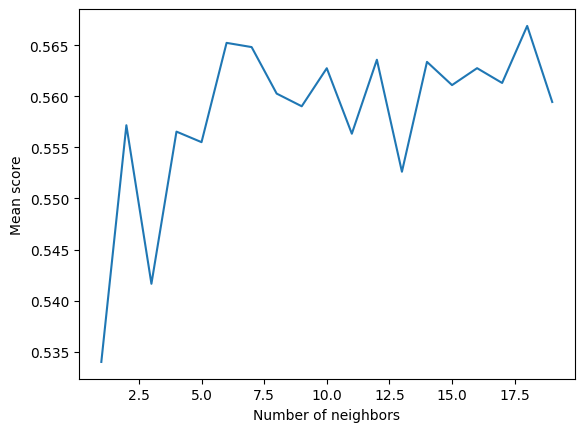

KNN result with cross validation: 0.6146338438579714


<Figure size 640x480 with 0 Axes>

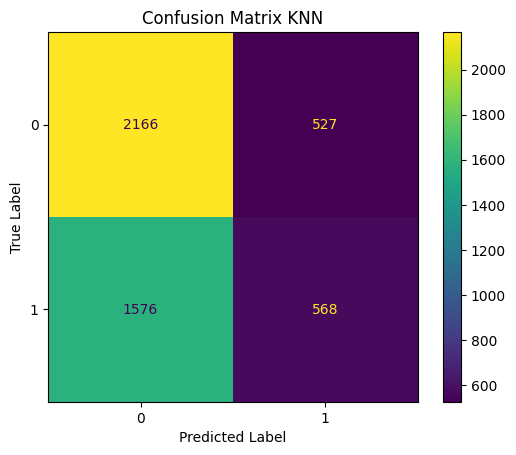

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


dFeat = df_2.iloc[:, 0:17]
dClass=df_2.iloc[:,-1]

kf=KFold(n_splits=6)
mean_scores=[]

for neig in range(1,20):
    score_test=[]
    for train, test in kf.split(dFeat,dClass):
        dClass_training=dClass.iloc[train]
        dClass_test=dClass.iloc[test]
        dFeat_training=dFeat.iloc[train,:]
        dFeat_test=dFeat.iloc[test,:]

        model = KNeighborsClassifier(n_neighbors=neig)
        model.fit(dFeat_training,dClass_training)
        score_test.append(model.score(dFeat_test, dClass_test))

    mean_scores.append(np.mean(score_test))

plt.figure()
plt.plot(range(1,20),mean_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean score')
plt.savefig('KNN-scores.png')
plt.show()


score=[]
sum_confusion_matrix=[]


for train, test in kf.split(dFeat,dClass):
    dClass_training=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
    dFeat_training=dFeat.iloc[train,:]
    dFeat_test=dFeat.iloc[test,:]

    model_KNN = KNeighborsClassifier(n_neighbors=6)
    model_KNN.fit(dFeat_training,dClass_training)
    score.append(model.score(dFeat_test, dClass_test))

    y_pred = model_KNN.predict(dFeat_test)
    conf_matrix = confusion_matrix(dClass_test, y_pred)

    sum_confusion_matrix.append(conf_matrix)

    
score_KNN=np.mean(score)
print(f'KNN result with cross validation: {score_KNN}')

plt.figure()
sum_confusion=sum(sum_confusion_matrix)
disp = ConfusionMatrixDisplay(sum_confusion, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix-KNN.png')



### Gaussian naive Bayes

GNB result with cross validation: 0.6100889856436084


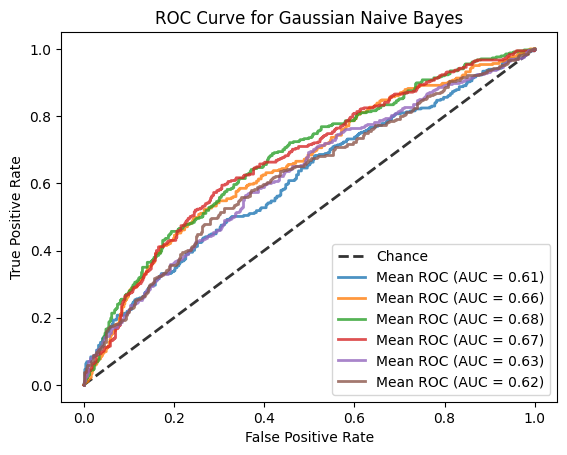

<Figure size 640x480 with 0 Axes>

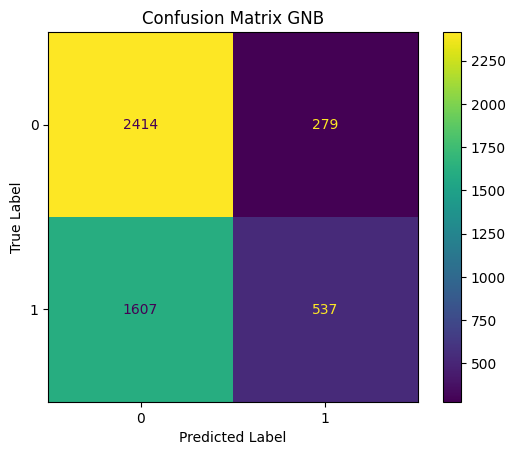

In [6]:
from sklearn.naive_bayes import GaussianNB

score=[]

tprs = []
mean_fpr = np.linspace(0, 1, 100)

sum_confusion_matrix=[]


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Chance', alpha=.8)

for train, test in kf.split(dFeat,dClass):
    dClass_training=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
    dFeat_training=dFeat.iloc[train,:]
    dFeat_test=dFeat.iloc[test,:]

    model_gnb = GaussianNB()
    model_gnb.fit(dFeat_training,dClass_training)
    score.append(model_gnb.score(dFeat_test, dClass_test))

    # ROC curve
    y_score = model_gnb.predict_proba(dFeat_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(dClass_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, label=f'Mean ROC (AUC = {roc_auc:.2f})', lw=2, alpha=.8)

    # Confusion matrix
    y_pred = model_gnb.predict(dFeat_test)
    conf_matrix = confusion_matrix(dClass_test, y_pred)

    sum_confusion_matrix.append(conf_matrix)

score_GNB=np.mean(score)
print(f'GNB result with cross validation: {score_GNB}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.savefig('ROC-GNB.png')
plt.show()

plt.figure()
sum_confusion=sum(sum_confusion_matrix)
disp = ConfusionMatrixDisplay(sum_confusion, display_labels=model_gnb.classes_)
disp.plot()
plt.title('Confusion Matrix GNB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix-GNB.png')

### SVM

SVM result with cross validation: 0.5896182903318051


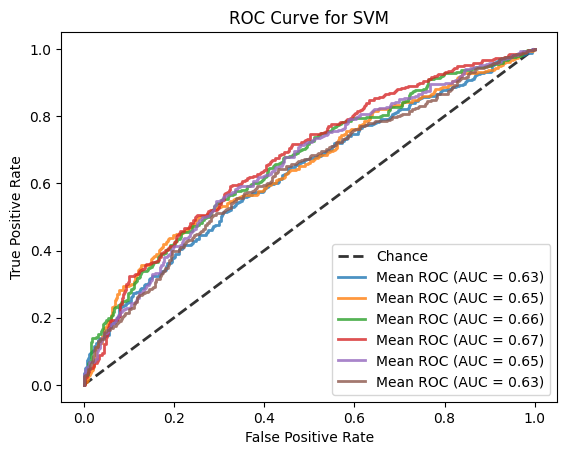

<Figure size 640x480 with 0 Axes>

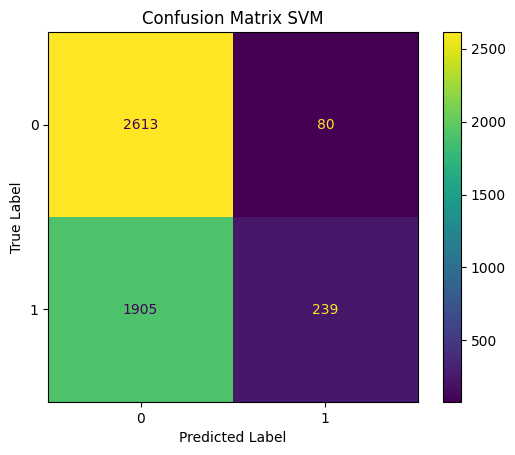

In [7]:
from sklearn import svm

score=[]

tprs = []
mean_fpr = np.linspace(0, 1, 100)

sum_confusion_matrix=[]


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Chance', alpha=.8)

for train, test in kf.split(dFeat,dClass):
    dClass_training=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
    dFeat_training=dFeat.iloc[train,:]
    dFeat_test=dFeat.iloc[test,:]

    model_svm = svm.SVC()
    model_svm.fit(dFeat_training,dClass_training)
    score.append(model_svm.score(dFeat_test, dClass_test))

    # ROC curve
    y_score = model_svm.decision_function(dFeat_test)
    
    fpr, tpr, _ = roc_curve(dClass_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Mean ROC (AUC = {roc_auc:.2f})', lw=2, alpha=.8)

    # Confusion matrix
    y_pred = model_svm.predict(dFeat_test)
    conf_matrix = confusion_matrix(dClass_test, y_pred)

    sum_confusion_matrix.append(conf_matrix)

score_SVM=np.mean(score)
print(f'SVM result with cross validation: {score_SVM}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.savefig('ROC-SVM.png')
plt.show()

plt.figure()
sum_confusion=sum(sum_confusion_matrix)
disp = ConfusionMatrixDisplay(sum_confusion, display_labels=model_svm.classes_)
disp.plot()
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix-SVM.png')

### Random Forest

RF result with cross validation: 0.6330392768814642


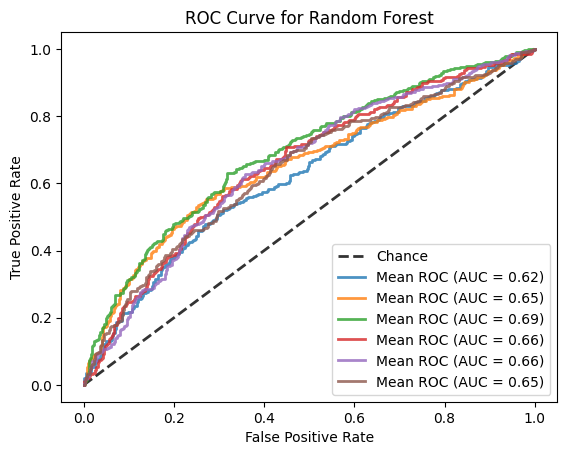

<Figure size 640x480 with 0 Axes>

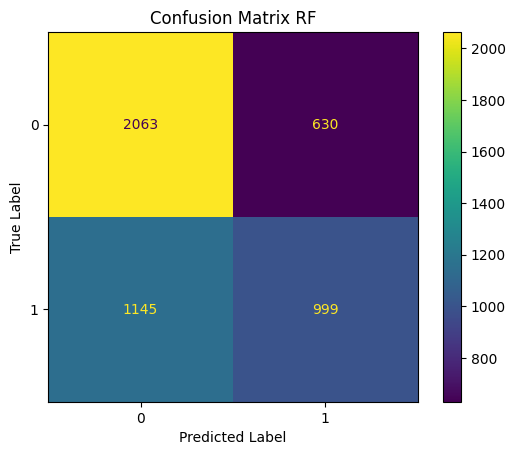

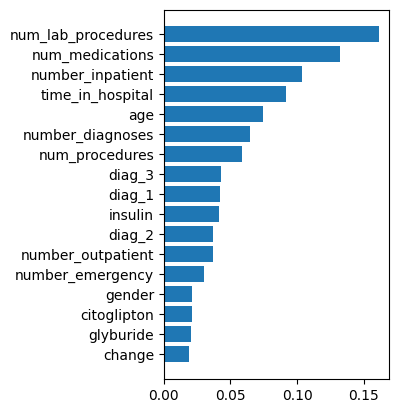

In [7]:
from sklearn.ensemble import RandomForestClassifier


score=[]
tprs = []
mean_fpr = np.linspace(0, 1, 100)
sum_confusion_matrix=[]

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Chance', alpha=.8)

for train, test in kf.split(dFeat,dClass):
    dClass_training=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
    dFeat_training=dFeat.iloc[train,:]
    dFeat_test=dFeat.iloc[test,:]

    model_rf = RandomForestClassifier(n_estimators=1000, min_samples_split=10)
    model_rf.fit(dFeat_training,dClass_training)
    score.append(model_rf.score(dFeat_test, dClass_test))

    # Predict probabilities
    y_score = model_rf.predict_proba(dFeat_test)[:, 1]
    
    # Compute ROC curve and area under the curve
    fpr, tpr, _ = roc_curve(dClass_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Mean ROC (AUC = {roc_auc:.2f})', lw=2, alpha=.8)

    y_pred = model_rf.predict(dFeat_test)
    conf_matrix = confusion_matrix(dClass_test, y_pred)

    sum_confusion_matrix.append(conf_matrix)

score_RF=np.mean(score)
print(f'RF result with cross validation: {score_RF}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.savefig('ROC-RF.png')
plt.show()

plt.figure()
sum_confusion=sum(sum_confusion_matrix)
disp = ConfusionMatrixDisplay(sum_confusion, display_labels=model_rf.classes_)
disp.plot()
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix-RF.png')


plt.figure()
def feature_importance(model,name):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, df_2.columns[sorted_idx])
    plt.savefig(f'feature_importance-{name}.png')

feature_importance(model_rf,'RF')


### Feature elimination

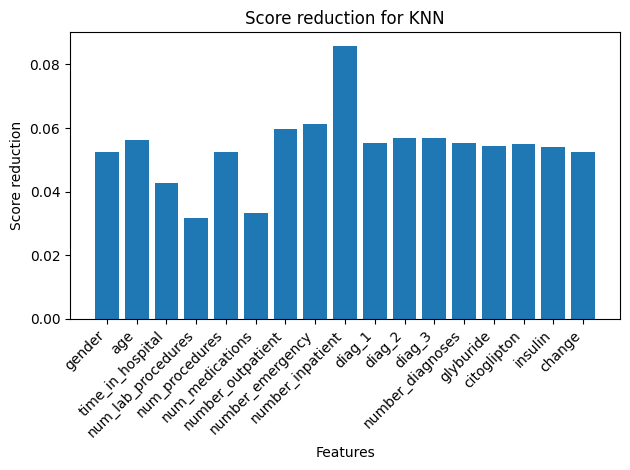

<Figure size 640x480 with 0 Axes>

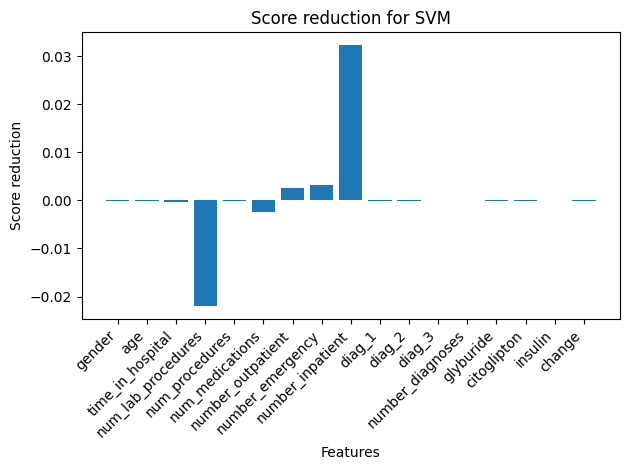

<Figure size 640x480 with 0 Axes>

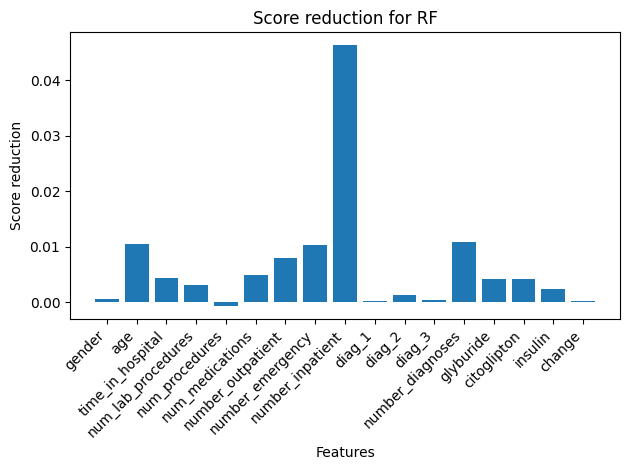

<Figure size 640x480 with 0 Axes>

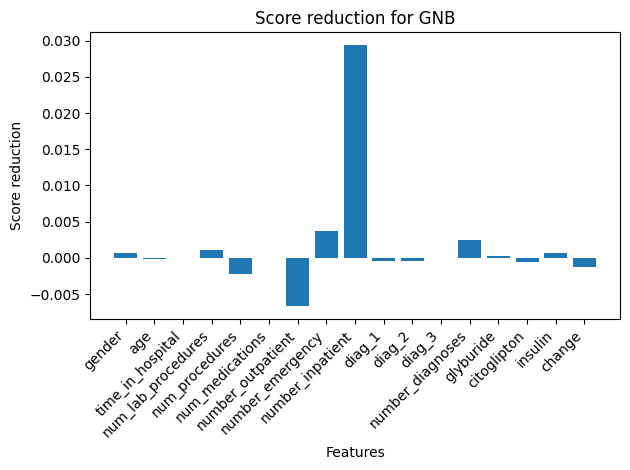

<Figure size 640x480 with 0 Axes>

In [18]:
def feature_elimination(model,name, all_score):
    dClass=df_2.iloc[:,-1]
    kf=KFold(n_splits=6)
    score_reduction=[]
    column_names = df_2.columns.tolist()
    df_2_modified = df_2.iloc[:, :-1]
    
    for i in range(0,17):
        dFeat = df_2_modified.drop(df_2.columns[i], axis=1)
        score=[]
        for train, test in kf.split(dFeat,dClass):
            dClass_training=dClass.iloc[train]
            dClass_test=dClass.iloc[test]
            dFeat_training=dFeat.iloc[train,:]
            dFeat_test=dFeat.iloc[test,:]

            if name=='KNN':
                model = KNeighborsClassifier(n_neighbors=neig)
            elif name=='SVM':
                model = svm.SVC()
            elif name=='RF':
                model = RandomForestClassifier(n_estimators=1000, min_samples_split=10)
            elif name=='GNB':
                model = GaussianNB()
            model.fit(dFeat_training,dClass_training)
            score.append(model.score(dFeat_test, dClass_test))

        score_reduction.append(all_score-np.mean(score))

    plt.figure()
    plt.bar(column_names[0:17], score_reduction)
    plt.xlabel('Features')
    plt.ylabel('Score reduction')
    plt.title(f'Score reduction for {name}')
    plt.xticks(column_names[0:17])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'feature_elimination-{name}.png')

feature_elimination(model,'KNN',score_KNN)
feature_elimination(model_svm,'SVM',score_SVM)
feature_elimination(model_rf,'RF',score_RF)
feature_elimination(model_gnb,'GNB',score_GNB)




